In [60]:


!pip install contractions

import re, string, unicodedata
import contractions
  
from bs4 import BeautifulSoup

import numpy as np 
import pandas as pd
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import  stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

distutils: c:\users\shan\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\shan\appdata\local\programs\python\python39\Include
user = False[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shan\AppData\Roaming\nltk_data...

home = None
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!root = None
prefix = None
distutils: c:\users\shan\appdata\local\programs\python\python39\Include\UNKNOWN
sysconfig: c:\users\shan\appdata\local\programs\python\python39\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\shan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pi

In [61]:
ds=pd.read_csv("Tweets.csv")

In [62]:
ds.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [63]:
ds=ds[['text','airline_sentiment']]

In [64]:
ds

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,positive
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,negative
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,neutral
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",negative


In [65]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information 
ds.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [66]:
def replace_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

ds['text'] = ds['text'].apply(lambda x: replace_html(x))
ds.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [67]:
def replace_contractions(text):
      return contractions.fix(text)

ds['text'] = ds['text'].apply(lambda x: replace_contractions(x))
ds.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [68]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

ds['text'] = ds['text'].apply(lambda x: remove_numbers(x))
ds.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [69]:
ds['text'] = ds.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [70]:
ds.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [71]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


stopwords = list(set(stopwords) - set(customlist)) 

In [72]:
ds.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [73]:
lemmatizer=WordNetLemmatizer()

def remove_non_ascii(words):
    #Remove non-ascii words
    newwords=[]
    for i in words:
        newword=unicodedata.normalize('NFKD',i).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        newwords.append(newword)
    return newwords


def to_lowercase(words):
    #Convert all characters to lowercase
    newwords = []
    for word in words:
        new_word = word.lower()
        newwords.append(new_word)
    return newwords

def remove_punctuation(words):
    """Remove punctuation """
    newwords = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            newwords.append(new_word)
    return newwords

def remove_stopwords(words):
    """Remove stop words """
    newwords = []
    for word in words:
        if word not in stopwords:
            newwords.append(word)
    return newwords

def lemmatize_list(words):
    newwords = []
    for word in words:
      newwords.append(lemmatizer.lemmatize(word, pos='v'))
    return newwords

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

ds['text'] = ds.apply(lambda row: normalize(row['text']), axis=1)
ds.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


In [74]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(ds['text'])

data_features = data_features.toarray() 

data_features.shape

In [82]:
x=data_features
y=ds['airline_sentiment']

In [83]:
labels = ds['airline_sentiment']
labels = labels.astype('string')

In [84]:
data_features.shape

(14640, 5000)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
xtrain,xtest,ytrain,ytest=train_test_split(data_features,labels,test_size=.3,random_state=42)

In [87]:
xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
ytrain

7717      neutral
13854    negative
11719    negative
239      positive
8582      neutral
           ...   
5191     positive
13418    negative
5390     negative
860      negative
7270      neutral
Name: airline_sentiment, Length: 10248, dtype: string

In [89]:
# Using Random Forest to build model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(xtrain, ytrain)

print(forest)

print(np.mean(cross_val_score(forest, x, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7217213114754097


In [94]:
yresult=forest.predict(xtest)

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




In [96]:
cm=confusion_matrix(ytest,yresult)

In [97]:
print(cm)

[[2547  200   67]
 [ 398  417   69]
 [ 201   96  397]]


In [98]:
from sklearn.linear_model import LogisticRegression

In [100]:
model = LogisticRegression(penalty="l2", C=0.1)
model.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [101]:
score = model.score(xtest, ytest)
score

0.7955373406193078

              precision    recall  f1-score   support

    negative       0.84      0.92      0.88      2814
     neutral       0.64      0.54      0.58       884
    positive       0.76      0.63      0.69       694

    accuracy                           0.80      4392
   macro avg       0.75      0.69      0.72      4392
weighted avg       0.79      0.80      0.79      4392



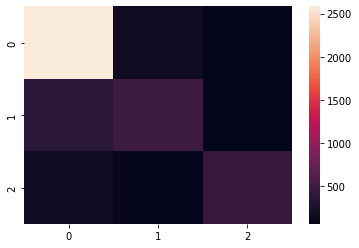

In [102]:
#to check the confusion matrix and report
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(ytest, model.predict(xtest)))
print(classification_report(ytest, model.predict(xtest)))

In [103]:
from sklearn.svm import SVC
svm=SVC()
svm=SVC(kernel="rbf", C=0.025, probability=True)

In [ ]:
svm.fit(xtrain,ytrain)

In [ ]:
After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
Accuracy score was upto 80%